<a href="https://colab.research.google.com/github/suphalaksana/Multivariate/blob/main/Exam01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#load data

ใช้ pandas

In [1]:
import pandas as pd


In [2]:
data = pd.read_csv('Pizza.csv') #ตั้งชื่อตัวแปรชื่อ data
data.head(10)

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
5,A,14075,31.14,20.23,42.31,4.92,1.65,1.40,4.67
6,A,14082,31.21,20.97,41.34,4.71,1.58,1.77,4.63
7,A,14097,28.76,21.41,41.60,5.28,1.75,2.95,4.72
8,A,14117,28.22,20.48,45.10,5.02,1.71,1.18,4.93
9,A,14133,27.72,21.19,45.29,5.16,1.66,0.64,4.95


## ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions

In [3]:
data.shape #ดูขนาดของข้อมูล

(300, 9)

## ลอง plot scatter matrix เพื่อดูการกระจาย ของ data ใน มุมมองต่างๆ

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ad299a290>,
      dtype=object)

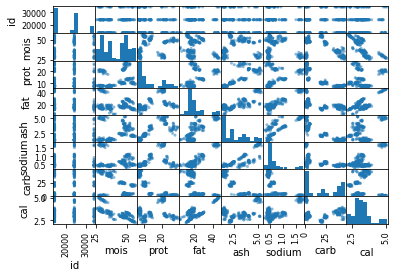

In [4]:
pd.plotting.scatter_matrix(data)

#เนื่องจาก Data  มี dimensions มากเกินไปเราจะทดสอบดูว่า column  ใด ให้ข้อมูลซ้ำกับ column อื่น แล้วลบมันออก

ลบแถวที่ไม่ใช่ตัวเลขออก ซึ่งก็คือแถวที่ 1

In [5]:
newdata = data.iloc[:,1:]  #เอาทุกแถวถึงแถวที่1
newdata.head()

,id,mois,prot,fat,ash,sodium,carb,cal
0,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


#ตรวจสอบว่าละหว่าง columns มี correlationกันมากน้อยแค่ไหน ด้วย numpy

In [6]:
import numpy as np #numpy ใช้กับข้อมูลที่เป็นตัวเลข


In [7]:
corr = np.corrcoef(newdata.to_numpy().T)

In [8]:
corr.shape #ดูขนาดของ correlation

(8, 8)

In [9]:
corr

array([[ 1.        ,  0.03259505, -0.07648546, -0.00486006, -0.03407156,
        -0.01515608,  0.01496614, -0.02120862],
       [ 0.03259505,  1.        ,  0.36024768, -0.17131821,  0.26555552,
        -0.1022789 , -0.59180165, -0.76444054],
       [-0.07648546,  0.36024768,  1.        ,  0.49800167,  0.8238437 ,
         0.42912952, -0.85354226,  0.0702581 ],
       [-0.00486006, -0.17131821,  0.49800167,  1.        ,  0.79163396,
         0.93332522, -0.64023817,  0.7645671 ],
       [-0.03407156,  0.26555552,  0.8238437 ,  0.79163396,  1.        ,
         0.80812215, -0.89898837,  0.32646845],
       [-0.01515608, -0.1022789 ,  0.42912952,  0.93332522,  0.80812215,
         1.        , -0.62017634,  0.6719575 ],
       [ 0.01496614, -0.59180165, -0.85354226, -0.64023817, -0.89898837,
        -0.62017634,  1.        , -0.02348458],
       [-0.02120862, -0.76444054,  0.0702581 ,  0.7645671 ,  0.32646845,
         0.6719575 , -0.02348458,  1.        ]])

In [10]:
for i in range(corr.shape[0] ): #วน loop เพื่อดูว่ามีค่า correlation ใด มีค่าเท่ากับ 1 โดยไม่เอาค่าจากเส้นทแยงมุม
  for j in  range(corr.shape[1] ):
    if( i !=j) and (corr [i,j] == 1.):
      print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

จากการ วน loop ไม่มีค่า correlation เท่ากับ 1 เลย แสดงว่าไม่มีแถวใดที่ซ้ำกัน

plot กราฟ parallel coordinate

In [11]:
from matplotlib import pyplot as plt

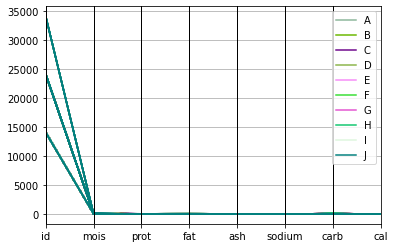

In [12]:
pd.plotting.parallel_coordinates(data,'brand')

ลบคอลัมน์   id ออก เพราะไม่ใช่ตัวเลข แต่เป็นอักขระ string

In [26]:
data_exam1 = data.drop(['id'],axis=1) 
data_exam

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


ลบคอลัมน์ brand ออก เพราะไม่ใช่ตัวเลข แต่เป็นอักขระ string

In [28]:
data_exam2 = data.drop(['brand','id'],axis=1)   
data_exam

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


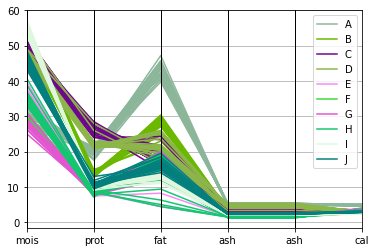

In [33]:
pd.plotting.parallel_coordinates(data_exam1,'brand',cols=['mois','prot','fat','ash','ash','cal'])

จากการ plot pararallel พบว่า dimensions มีจำนวนมากเกินไป ทำให้การ plot ไม่ช่วยให้เข้าใจอะไร  จึงต้องทำ PCA เพื่อลดจำนวน dimensions ของข้อมูล

#ทำ PCA เพื่อลดจำนวน dimensions ของข้อมูล


In [35]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components=2)  #plot แค่ 2 dimensions แรก

In [46]:
new_pca = pca.fit_transform(data_exam2.to_numpy()) #record แนวนอน (แถว) dimension หลักแนวตั้ง

In [53]:
new_pca.shape #ดูขนาดของ  new PCA   มี300 data  มี 2 dimensions

(300, 2)

In [42]:
new_pca

array([[-2.49517479e+01,  2.68116678e+01],
       [-2.46119758e+01,  2.56595634e+01],
       [-2.49384190e+01,  2.69305710e+01],
       [-2.43255609e+01,  2.35235671e+01],
       [-2.38660483e+01,  2.26528128e+01],
       [-2.42716473e+01,  2.25496261e+01],
       [-2.38806695e+01,  2.18852969e+01],
       [-2.23894923e+01,  2.39358506e+01],
       [-2.45074215e+01,  2.66033180e+01],
       [-2.50928469e+01,  2.71508163e+01],
       [-2.48185674e+01,  2.76159021e+01],
       [-2.39395254e+01,  2.75274080e+01],
       [-2.44496724e+01,  2.62221990e+01],
       [-2.28480039e+01,  2.27702098e+01],
       [-2.42812192e+01,  2.25656557e+01],
       [-2.38786302e+01,  2.39995991e+01],
       [-2.32390338e+01,  1.96576785e+01],
       [-2.36081213e+01,  1.88694931e+01],
       [-2.34833228e+01,  2.08403006e+01],
       [-2.30861647e+01,  2.25687679e+01],
       [-2.44317537e+01,  2.88343106e+01],
       [-2.39812139e+01,  2.72251577e+01],
       [-2.43513670e+01,  2.27327854e+01],
       [-2.

In [50]:
set(data['brand'])


{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

In [52]:
B = set(data['brand'])
B

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

#สร้าง Dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลข เพื่อจะได้ plot สีได้

In [81]:
 #color_list = {}
 #num = 0
#for each_b in B:
   #if each_b not in color_list:
    #color_list[each_b] = num
    #num += 1

In [72]:
#color_list

#สร้าง color list แบบข้างล่างนี้ ลำดับจะไม่มีการเปลี่ยนแปลง

In [66]:
B_l = list(B)  ### แปลงเป็น list
B_l.sort() ### เรียงค่่า สมาชิกจากน้อยไปมาก
color_list2 = {}
num = 0
for each_b in B_l:
    if each_b not in color_list2:
        color_list2[each_b] = num
        num += 1

In [67]:
color_list2

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9}

#แทนค่า text ใน Dictionary ด้วยตัวเลขที่เรากำหนด

In [76]:
data_exam3 = data_exam1.replace(color_list2)

In [77]:
data_exam3

,brand,mois,prot,fat,ash,sodium,carb,cal
0,0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,0,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,0,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,0,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,0,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,9,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,9,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,9,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,9,47.60,10.43,15.18,2.32,0.56,24.47,2.76


#Plot กราฟ Scatter

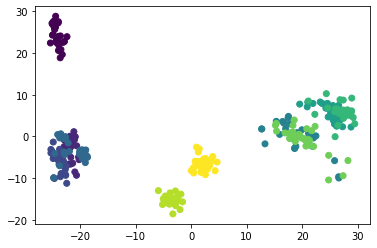

In [79]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_exam3['brand'])

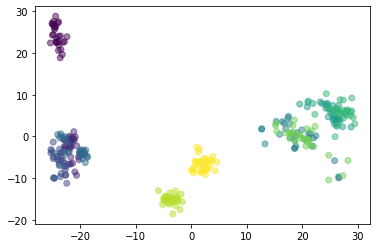

In [80]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_exam3['brand'],alpha=0.5)

#ทดลองเปรียบเทียบ fat กับ carb

In [99]:
fc = data_exam3[(data_exam3['brand']==1) | (data_exam3['brand']==9)]  ## ใช้  | และ  &  แทน  or  และ  and  ใน pandas
fc

,brand,mois,prot,fat,ash,sodium,carb,cal
29,1,49.57,13.70,29.07,3.62,1.10,4.04,3.33
30,1,52.68,14.38,25.72,3.26,0.93,3.96,3.05
31,1,48.53,13.14,30.38,3.55,0.99,4.40,3.44
32,1,50.19,13.78,28.39,3.56,1.00,4.08,3.27
33,1,50.67,13.21,27.66,3.64,1.00,4.82,3.21
...,...,...,...,...,...,...,...,...
295,9,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,9,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,9,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,9,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [85]:
pca = PCA(n_components=2)
new_pca2 = pca.fit_transform(fc.iloc[:,1:].to_numpy())

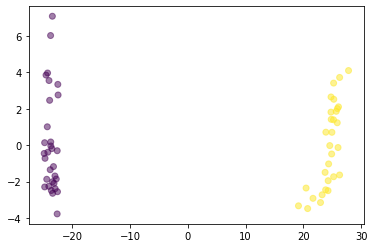

In [86]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = fc['brand'],alpha=0.5)

In [100]:
fat_pca = pca.transform(fc[fc['brand']==1].iloc[:,1:].to_numpy())
carb_pca = pca.transform(fc[fc['brand']==9].iloc[:,1:].to_numpy())

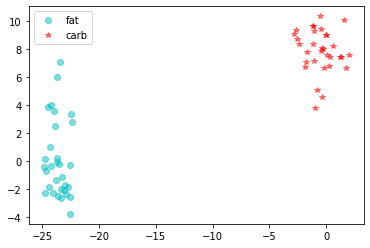

In [101]:
plt.plot(fat_pca[:,0],fat_pca[:,1],'oc',alpha=0.5,label='fat')
plt.plot(carb_pca[:,0],carb_pca[:,1],'*r',alpha=0.5,label='carb')
plt.legend()

#2 Principle components เป็นตัวแทนของข้อมูลได้ดีแค่ไหน

In [102]:
pca.explained_variance_ratio_

array([0.98886244, 0.01080004])

#การใส่ชื่อกราฟและ แกน

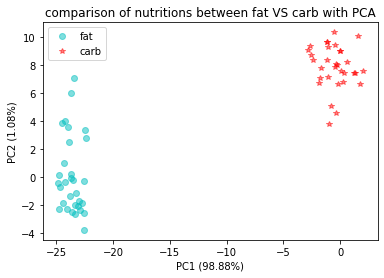

In [105]:
plt.plot(fat_pca[:,0],fat_pca[:,1],'oc',alpha=0.5,label='fat')
plt.plot(carb_pca[:,0],carb_pca[:,1],'*r',alpha=0.5,label='carb')
plt.legend()
plt.title('comparison of nutritions between fat VS carb with PCA')
plt.xlabel('PC1 (98.88%)')
plt.ylabel('PC2 (1.08%)');